In [1]:
import torch
import torch.nn.functional as F
from matplotlib import pyplot as plt
import numpy as np
import sys
from data_utils import toDeviceDataLoader, load_cifar, to_device
from model_utils import VGG
from utils import asr, accuracy, show_attack, project_lp

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
dataset_root = '<insert path>'
cifar10_train, cifar10_val, cifar10_test = load_cifar(dataset_root)
train_loader, val_loader, test_loader = toDeviceDataLoader(cifar10_train, cifar10_val, cifar10_test, device = device)

In [3]:
mdl = to_device(VGG('VGG16'), device)
mdl.load_state_dict(torch.load('../models/torch_cifar_vgg.pth'))
mdl = mdl.eval()

In [11]:
def fgsm(x, y, k, norm = np.inf, xi = 1e-1, step_size = 1e-1, device = torch.device('cuda:0')):
    raise Exception('fgsm not implemented')

In [12]:
def pgd(x, y, k, norm = np.inf, xi = 1e-1, step_size = 1e-2, epochs = 40, device = torch.device('cuda:0')):
    raise Exception('pgd not implemented')

In [6]:
#Initial Test on Small Batch
x, y = next(iter(test_loader))
print('Base Accuracy {}'.format(accuracy(mdl(x), y))) # Varies with batch, mine ~ 0.875
print('FGSM Accuracy: {}'.format(accuracy(mdl(x + fgsm(x, y, mdl)), y))) # Varies with batch, mine ~ 0
print('PGD Accuracy: {}'.format(accuracy(mdl(x + pgd(x, y, mdl)), y))) # Varies with batch, mine ~ 0

Base Accuracy 0.875
FGSM Accuracy: 0.0
PGD Accuracy: 0.0


<Figure size 432x288 with 0 Axes>

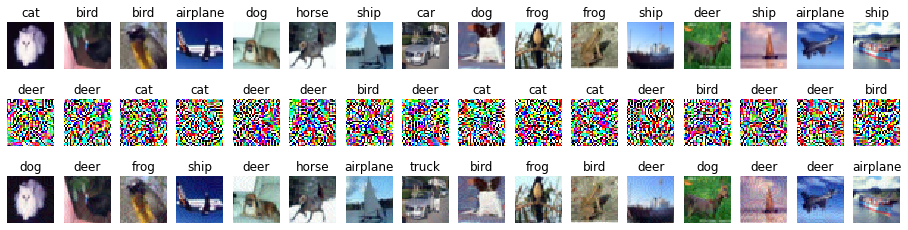

In [10]:
v = pgd(x, y, mdl)
show_attack(x, v, mdl)

In [8]:
#Test on Entire Dataset (this will take a few minutes depending on how many epochs of pgd you have)
print('Base Accuracy: {}'.format(1 - asr(test_loader, mdl))) # ~ 0.9171
print('FGSM Accuracy: {}'.format(1 - asr(test_loader, mdl, fgsm))) # ~ 0.0882
print('PGD Accuracy: {}'.format(1 - asr(test_loader, mdl, pgd))) # ~ 0.0001

Base Accuracy: 0.9171000123023987
FGSM Accuracy: 0.08819997310638428
PGD Accuracy: 0.00010001659393310547
